* **id**: id da vaga 
* **companyId**: id da empresa 
* **name**: titulo da vaga 
* **description**: Descricao sobre a vaga
* **careerPageName**: Nome da empresa que esta publicando a vaga 
* **type**: tipo de contratacao 
* **publishedDate**: data que a vaga foi publicada 
* **applicationDeadline**: data limite para se aplicar para a vaga
* **isRemoteWork**: se a vaga e de modelo remoto 
* **city**: cidade que a vaga foi publicada
* **state**: estado que a vaga foi publicada
* **country**: pais que a vaga foi publicada
* **disabilities**: se a vaga e elegivel para pcd's

In [1]:
#importando as libs necessarias para a analise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import re
import nltk
pd.set_option("display.max_rows", 100)

In [2]:
#salvando os dados em um dataframe pandas
df = pd.read_csv('jobs.csv', sep = ',', encoding = 'utf-8' )

In [3]:
print(f'coletamos um total de : {df.shape[0]} vagas')

coletamos um total de : 15898 vagas


In [4]:
df.columns

Index(['id', 'companyId', 'name', 'description', 'careerPageName', 'type',
       'publishedDate', 'applicationDeadline', 'isRemoteWork', 'city', 'state',
       'country', 'disabilities'],
      dtype='object')

In [5]:
df.head()

,id,companyId,name,description,careerPageName,type,publishedDate,applicationDeadline,isRemoteWork,city,state,country,disabilities
0,5301231,47789,Pessoa Estagiária Superior Administrativo,Na Britvic Brasil trabalhamos com a missão de ...,Britvic Brasil,vacancy_type_internship,2023-08-26T14:26:12.766Z,NaN,False,Araguari,Minas Gerais,Brasil,False
1,5334728,49570,Estágio em Produção de Conteúdo,Se você curte criação e projetos inovadores na...,Escola São Domingos & Sundays,vacancy_type_internship,2023-08-26T13:50:17.030Z,NaN,False,Vitória,Espírito Santo,Brasil,True
2,5342661,46105,Estágio em Estilo,Somos mais de 350 #Icommnicos - venha ser um t...,Icomm Group,vacancy_type_internship,2023-08-25T22:57:41.120Z,2023-09-19T00:00:00.000Z,False,São Paulo,São Paulo,Brasil,True
3,5246533,294,Estágio em Operações,Somos uma empresa de tecnologia movida por nos...,Grupo Petlove,vacancy_type_internship,2023-08-25T22:06:20.089Z,2023-09-18T00:00:00.000Z,False,São Paulo,São Paulo,Brasil,True
4,5342369,1716,Estágio de Aprovação de Pessoas candidatas,Você tem calafrios só de pensar em trabalho se...,GeekHunter 💜,vacancy_type_internship,2023-08-25T21:40:50.194Z,NaN,True,NaN,Santa Catarina,Brasil,True


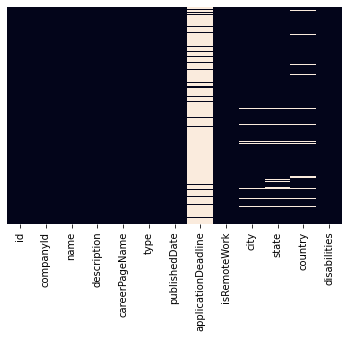

In [6]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False);

podemos observar que maioria das vagas não divulgam a data limite para se aplicar, acredito eu que as empresas já tenham a data pré-definida mas pode haver imprevistos ou por algum tipo de estrategia optam por não divulgar.

e também que há alguns valores faltantes nas tabelas de região da vaga(cidade/estado/pais) isso pode ser porque publicam a vaga com uma das 3 informações e pode-se subentender as outras, ou porque a vaga é de modelo remoto(analisaremos depois). 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15898 entries, 0 to 15897
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   15898 non-null  int64 
 1   companyId            15898 non-null  int64 
 2   name                 15898 non-null  object
 3   description          15898 non-null  object
 4   careerPageName       15898 non-null  object
 5   type                 15898 non-null  object
 6   publishedDate        15898 non-null  object
 7   applicationDeadline  1907 non-null   object
 8   isRemoteWork         15898 non-null  bool  
 9   city                 15157 non-null  object
 10  state                14879 non-null  object
 11  country              15223 non-null  object
 12  disabilities         15784 non-null  object
dtypes: bool(1), int64(2), object(10)
memory usage: 1.5+ MB


vemos que há a necessidade de transformar o tipo das colunas publishedDate e applicationDeadline em data.

In [8]:
#convertentendo colunas para o formato datetime
df['publishedDate'] = pd.to_datetime(df['publishedDate'])
df['applicationDeadline'] = pd.to_datetime(df['applicationDeadline'])

# EDA

In [9]:
company_count = df['careerPageName'].value_counts()

In [10]:
company_count

Cogna Educação                                                                 299
Itaú Unibanco                                                                  248
Raízen                                                                         225
Stefanini Group                                                                209
PagBank                                                                        193
                                                                              ... 
Confidencial - Empresa do Segmento de Bens de Consumo                            1
Thymos Energia                                                                   1
Oportunidade                                                                     1
Buriti Empreendimentos                                                           1
Hospital e Maternidade Municipal Dr. Odelmo Leão Carneiro - SPDM Afiliadas       1
Name: careerPageName, Length: 2602, dtype: int64

In [11]:
top_20 = company_count.head(20)
top_20

Cogna Educação                    299
Itaú Unibanco                     248
Raízen                            225
Stefanini Group                   209
PagBank                           193
Unidades V4 Company               168
Confidencial                      152
Vem Pra Vivo!                     139
Vivo Diversidade                  115
EuroChem                          107
J&T Express Brasil                100
POP Trade                          91
EMS                                83
NAVA | Technology for Business     81
Infotec Brasil                     78
Sicredi                            77
Energisa Estágio                   70
Unidas                             66
Seja Globalweb                     65
Renault do Brasil                  57
Name: careerPageName, dtype: int64

essa são as 20 empresas que mais estão com vagas disponiveis na nossa busca

In [12]:
job_lvl = df['type'].value_counts()
percent_job_lvl = ( job_lvl / len(df) ) * 100

In [13]:
percent_job_lvl

vacancy_type_effective      74.097371
vacancy_type_internship     12.900994
vacancy_type_talent_pool     5.944144
vacancy_legal_entity         4.006793
vacancy_type_temporary       1.773808
vacancy_type_associate       0.654170
vacancy_type_autonomous      0.289345
vacancy_type_freelancer      0.125802
vacancy_type_parter          0.075481
vacancy_type_outsource       0.069191
vacancy_type_apprentice      0.056611
vacancy_type_trainee         0.006290
Name: type, dtype: float64

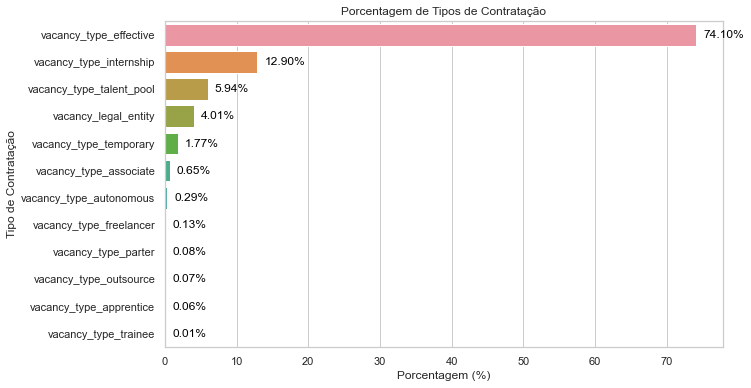

In [14]:
percent_job_lvl = percent_job_lvl.sort_values(ascending=False)

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percent_job_lvl.values, y=percent_job_lvl.index)

for index, value in enumerate(percent_job_lvl):
    ax.text(value + 1, index, f'{value:.2f}%', va='center', color='black')

plt.xlabel('Porcentagem (%)')
plt.ylabel('Tipo de Contratação')
plt.title('Porcentagem de Tipos de Contratação')
plt.show()

vemos a maioria das vagas são de modelo efetivo, cerca de 74%, cerca de 13% para modelo de estágio e os outros 13% são dividos entre outros modelos de contratação.

In [15]:
remote = (df['isRemoteWork'].value_counts() / len(df)) * 100
remote

False    86.482576
True     13.517424
Name: isRemoteWork, dtype: float64

aproximadamente 86% das vagas são de modelo presencial/hibrido e 13,5% são de modelo remoto

In [16]:
disabilities = (df['disabilities'].value_counts() / len(df)) * 100
disabilities

True     71.386338
False    27.896591
Name: disabilities, dtype: float64

aproximadamente 71% das vagas são elegiveis para pcd's e 27% não.

In [17]:
first_date = min(df['publishedDate'].dt.date)
last_date = max(df['publishedDate'].dt.date)

print(f'a primeira data é: {first_date} e a ultima: {last_date}')

a primeira data é: 2018-05-24 e a ultima: 2023-08-26


In [18]:
df['year'] = df['publishedDate'].dt.year
df['month'] = df['publishedDate'].dt.month

In [19]:
print(df['year'].value_counts())

2023    15071
2022      726
2021       78
2020       19
2019        2
2018        2
Name: year, dtype: int64


podemos ver que há vagas de até 5 anos atrás, acredito que isso seja algum erro de funcionamento pois dificilmente uma vaga não seria preenchida em tanto tempo

In [20]:
df['days_to_end'] = df['applicationDeadline'] - df['publishedDate']
df['days_to_end'] = df['days_to_end'].dt.days

In [21]:
df['days_to_end'].describe()

count    1907.000000
mean       63.787625
std       128.854610
min         1.000000
25%        19.000000
50%        34.000000
75%        56.000000
max      2705.000000
Name: days_to_end, dtype: float64

In [22]:
days_to_end = df['days_to_end'].dropna()

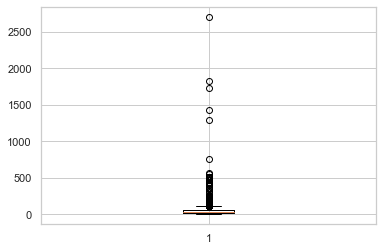

In [23]:
plt.boxplot(days_to_end);

observando a distribuição do tempo disponivel da vaga, podemos ver que a nossa média está quase o dobro da mediana isso sugere uma curva com assimetria a direita, indicando valores discrepantes que elevam o valor da média, 75% das vagas tem a duração de até 56 dias enquanto valor maximo chega até 2705 dias, por conta disso utilizaremos a mediana como medida central que indica o valor medio de 34 dias. 

In [24]:
country_counts = df['country'].value_counts()

In [25]:
country_counts

Brasil         15149
Argentina         40
México             8
Colômbia           7
Portugal           7
Peru               6
Paraguai           2
Uruguai            2
Guatemala          1
Reino Unido        1
Name: country, dtype: int64

a grande maioria das vagas é para o brasil mas ainda há algumas vagas internacionais.


In [26]:
state_counts = (df['state'].value_counts() / len(df)) * 100

In [27]:
state_counts

São Paulo              48.458926
Minas Gerais            6.755567
Rio de Janeiro          6.095106
Rio Grande do Sul       5.862373
Paraná                  5.824632
Santa Catarina          4.874827
Goiás                   2.163794
Ceará                   2.031702
Bahia                   1.736067
Distrito Federal        1.578815
Mato Grosso             1.484463
Espírito Santo          1.434143
Pernambuco              1.075607
Mato Grosso do Sul      0.754812
Pará                    0.710781
Maranhão                0.566109
Amazonas                0.440307
Paraíba                 0.320795
Rio Grande do Norte     0.314505
Alagoas                 0.257894
Rondônia                0.239024
Tocantins               0.176123
Sergipe                 0.163543
Piauí                   0.132092
Acre                    0.081771
Amapá                   0.037741
Roraima                 0.018870
Name: state, dtype: float64

a região sudeste é a que localiza a maior parte das vagas, somando aproximadamente 63% das vaga, sendo 48% apenas em SP, a segunda região que mais tem vagas é a região sul.

In [28]:
citie_counts = (df['city'].value_counts() / len(df)) * 100
citie_counts.head(20)  

São Paulo              27.707888
Rio de Janeiro          5.025789
Belo Horizonte          3.340043
Porto Alegre            3.056988
Barueri                 3.031828
Sao Paulo               2.843125
Curitiba                2.622971
Campinas                2.100893
Fortaleza               1.541074
Goiânia                 1.207699
Florianópolis           1.044156
Brasília                1.000126
Salvador                0.905774
Jundiaí                 0.748522
São José dos Campos     0.742232
Recife                  0.742232
Blumenau                0.735942
Itajaí                  0.710781
Ribeirão Preto          0.704491
Joinville               0.673041
Name: city, dtype: float64

a cidade de SP lidera o maior numero de vagas, com cerca de 30%, seguido das capitais dos estados da região sudeste: RJ, BH.

In [29]:
lvls = {
    'senior': ['senior', 'sr'],
    'pleno': ['pleno', 'pl'],
    'junior': ['junior', 'analista', 'jr'],
    'estagio': ['estagio', 'intern', 'estagiaria']}

def clear_accent(title):
    return unidecode(title)

def cat_title(title):
    title = title.lower()
    for cat, key in lvls.items():
        for i in key:
            if i in title:
                return cat            

In [30]:
df['name'] = df['name'].apply(clear_accent)

In [31]:
df['level'] = df['name'].apply(cat_title)

In [32]:
lvl_counts = df['level'].value_counts()

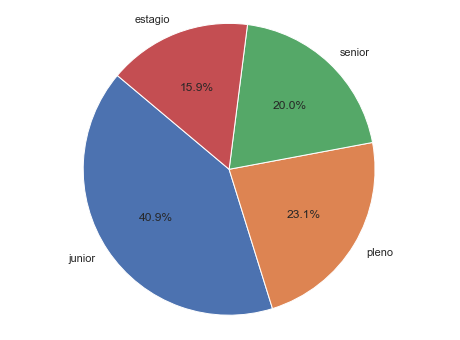

In [33]:
plt.figure(figsize=(8, 6))
plt.pie(lvl_counts.values, labels=lvl_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.show()

In [34]:
titles = df['name']

#criando uma lista com as palavras tokenizadas
tokens = [word.lower() for title in titles if isinstance(title, str) for word in word_tokenize(title)]
tokens = [token for token in tokens if len(token) > 2]  # Remover palavras curtas como jr, pl, sr

# Remover stopwords (palavras comuns que não contribuem para a análise)
stop_words = set(stopwords.words('portuguese'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Contar a frequência de cada palavra
word_freq = Counter(filtered_tokens)

print(word_freq.most_common(30)) 

[('analista', 8619), ('estagio', 2364), ('pleno', 2236), ('senior', 1831), ('junior', 1233), ('pessoa', 855), ('banco', 689), ('talentos', 660), ('tecnico', 556), ('marketing', 508), ('consultor', 502), ('negocios', 499), ('desenvolvedor', 477), ('vendas', 438), ('comercial', 437), ('engenharia', 419), ('sao', 407), ('suporte', 383), ('planejamento', 381), ('dados', 376), ('administrativo', 345), ('financeiro', 342), ('qualidade', 310), ('projetos', 306), ('vaga', 296), ('seguranca', 277), ('sistemas', 276), ('pessoas', 271), ('contabil', 270), ('desenvolvimento', 264)]


com uma simples busca de palavras mais frequentes no titulo das vagas podemos observar algumas aréas mais recorrentes como : marketing, negocios, desenvolvimento, vendas, engenharia, planejamento, dados, etc... 

# conclusão

## através da nossa análise pudemos extrair algumas informações como:

* a grande maioria das vagas optam pelo modelo presencial/hibrido;
* 70% das vagas são inclusivas para pcd's;
* a grande maioria das vagas está localizada na regiao sudeste, grande parte em SP e também nas capitais.
* a maioria das oportunidades é para nivel junior e a minoria para estágio.
* há temas recorrentes nos titulos das vagas como: marketing, vendas, desenvolvimento, entre outros.